In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
from matplotlib.pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
#Read data
VerkehrsZaehlung = pd.read_csv("https://raw.githubusercontent.com/thereallinusrg/Velo-Zueri-Unfaelle/main/data/2021_verkehrszaehlungen_werte_fussgaenger_velo.csv")
#VeloWege = gpd.read_file(r'data/Velo_wege.gpkg')
#Unfaelle = gpd.read_file(r'data/RoadTrafficAccidentLocations.gpkg')
VerkehrsZaehlung.head()


,FK_ZAEHLER,FK_STANDORT,DATUM,VELO_IN,VELO_OUT,FUSS_IN,FUSS_OUT,OST,NORD
0,U15G3063865,1357,2021-01-01T00:00,NaN,NaN,20.0,0.0,2682973,1246329
1,ECO09113499,3927,2021-01-01T00:00,0.0,3.0,NaN,NaN,2682873,1245891
2,U15G3063867,1358,2021-01-01T00:00,NaN,NaN,4.0,1.0,2683557,1251702
3,U15G3063869,3011,2021-01-01T00:00,NaN,NaN,0.0,5.0,2682978,1248744
4,YSH18065716,3279,2021-01-01T00:00,NaN,NaN,9.0,4.0,2683437,1247199


In [6]:
def resample(df):
  list_stations = df.FK_STANDORT.unique()
  dataframes = []
  for standort in list_stations:
    station = df.loc[df["FK_STANDORT"] == standort]
    station["Date_Hour"] = station["DATUM"].astype(str).str[:13]
    #station = station.set_index(pd.to_datetime(station['DATE_HOUR']))
    grouped = station.groupby("Date_Hour").agg({"FK_STANDORT": min, "VELO_IN": sum, "VELO_OUT": sum, "OST": min, "NORD": min})

    #merged = pd.merge(new, station, on = "DATUM")
    dataframes.append(grouped)
  
  combined = pd.concat(dataframes)

  return combined

Zaehlung_hourly = resample(VerkehrsZaehlung)
Zaehlung_hourly.head(50)

/var/folders/m7/_3h_ct5n68b9x7svmxnmpq980000gn/T/ipykernel_11812/4168483642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station["Date_Hour"] = station["DATUM"].astype(str).str[:13]
/var/folders/m7/_3h_ct5n68b9x7svmxnmpq980000gn/T/ipykernel_11812/4168483642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station["Date_Hour"] = station["DATUM"].astype(str).str[:13]
/var/folders/m7/_3h_ct5n68b9x7svmxnmpq980000gn/T/ipykernel_11812/4168483642.py:6: SettingWithCopyWarning: 
A value is trying to be set

,FK_STANDORT,VELO_IN,VELO_OUT,OST,NORD
Date_Hour,,,,,
2021-01-01T00,1357,0.0,0.0,2682973,1246329
2021-01-01T01,1357,0.0,0.0,2682973,1246329
2021-01-01T02,1357,0.0,0.0,2682973,1246329
2021-01-01T03,1357,0.0,0.0,2682973,1246329
2021-01-01T04,1357,0.0,0.0,2682973,1246329
2021-01-01T05,1357,0.0,0.0,2682973,1246329
2021-01-01T06,1357,0.0,0.0,2682973,1246329
2021-01-01T07,1357,0.0,0.0,2682973,1246329
2021-01-01T08,1357,0.0,0.0,2682973,1246329


In [8]:
# Turn it into a GeoDataFrame with point geometries
Zaehlungen = gpd.GeoDataFrame(
    Zaehlung_hourly, geometry=gpd.points_from_xy(Zaehlung_hourly.OST, Zaehlung_hourly.NORD))

<AxesSubplot:>

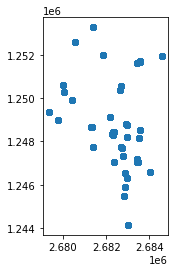

In [9]:
Zaehlungen.plot()